In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [2]:
data=pd.read_csv("./data/weatherHistory.csv")


# Data Preprocessing

In [3]:
data.head(10) 

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [4]:
data['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [5]:
# As the 'Loud Cover'contains only zeros,we will remove it
data.drop(['Loud Cover'],axis=1,inplace=True)
# We will also drop the 'Formatted Date' and 'Daily Summary' features
data.drop(['Formatted Date','Daily Summary'],axis=1,inplace=True)

In [6]:
#let's have a look over our data again
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
dtypes: float64(7), object(2)
memory usage: 5.9+ MB


### we can see there are some nan values in 'Precip Type' 

In [7]:
data['Precip Type'].unique()    


array(['rain', 'snow', nan], dtype=object)

In [8]:
data['Precip Type'].isnull().sum()

517

In [9]:
# we can't assign values to these nan's as it might affect the ordinality.
data.drop(['Precip Type'],axis=1,inplace=True)

#### Now let's seperate X,Y and do label encoding for 'Summary'

In [10]:
unique=data["Summary"].unique()
unique

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [11]:
le=LabelEncoder()
data['Summary']=le.fit_transform(data['Summary'])



In [12]:
X=data.iloc[:,1:]
Y=data.iloc[:,0]

# Data Exploration

In [13]:
X.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [14]:
X.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [15]:
#correlation between 'Temperature' and 'Apparent Temperature (C)' is almost close to 1. so we can drop one 'Apparent Temperature (C)'
X.drop(['Apparent Temperature (C)'],axis=1,inplace=True)

In [ ]:
# Let's, apply Z-score normalization to our data 
scaler=StandardScaler()
scaled_values=scaler.fit_transform(X.values)
X=pd.DataFrame(scaled_values,index=X.index,columns=X.columns)

In [16]:
X.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51


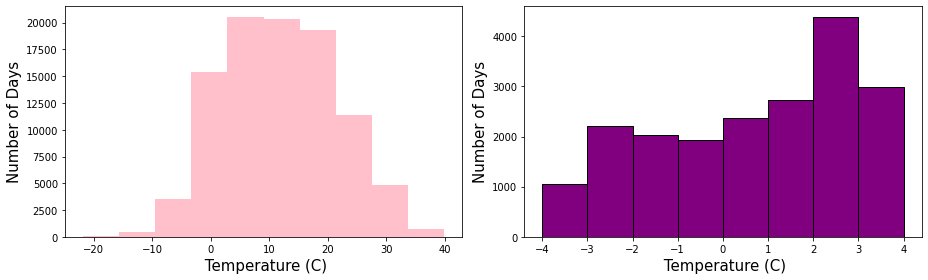

In [17]:
fig,ax=plt.subplots(1,2)
ax[0].hist(X['Temperature (C)'],color='pink')
ax[0].set_xlabel(" Temperature (C)", size = 15)
ax[0].set_ylabel("Number of Days", size = 15)
ax[1].hist(X['Temperature (C)'],bins=[-4,-3,-2,-1,0,1,2,3,4],color='purple', edgecolor='black')
ax[1].set_xlabel(" Temperature (C)", size = 15)
ax[1].set_ylabel("Number of Days", size = 15)

fig.set_figheight(4)
fig.set_figwidth(13)
plt.tight_layout()

plt.show()


## Classifying using Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [32]:
lg=LogisticRegression()

In [33]:
lg.fit(x_train,y_train)

LogisticRegression()

In [37]:
lg.score(x_test,y_test)

0.3813552293273617

We are getting 38% accuracy